# Fresh Market EDA:

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as da



In [3]:
data = pd.read_pickle(r"C:\Users\Jahir\DataspellProjects\FreshMarket-project\datos\fresh_market-limpio.pkl")
fresh = data.copy()

In [4]:
fresh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               999 non-null    string        
 1   branch                   999 non-null    category      
 2   city                     999 non-null    string        
 3   customer_type            999 non-null    string        
 4   gender                   999 non-null    category      
 5   product_line             999 non-null    string        
 6   unit_price               999 non-null    float64       
 7   quantity                 999 non-null    int64         
 8   tax_5%                   999 non-null    float64       
 9   total                    999 non-null    float64       
 10  date                     999 non-null    datetime64[ns]
 11  time                     999 non-null    object        
 12  payment                  999 non-null    

Nuestro dataset consta de 17 columnas y un total de 999 filas sin valores faltantes, el formato de cada columna se verifica que esta correcto. En la siguiente linea hacemos una descripcion estadistica general de todas nuestras variables numericas.

In [9]:
fresh[['unit_price', 'quantity', 'tax_5%', 'total','payment', 'cogs', 'gross_margin_percentage', 'gross_income','rating']].describe()

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.00,999.000000,999.000000
mean,55.296486,5.505506,15.381061,322.999389,307.618398,4.76,15.381061,6.970771
std,26.878903,2.921436,11.714604,246.006398,234.291748,0.00,11.714604,1.718357
min,0.170000,1.000000,0.510000,10.680000,10.170000,4.76,0.510000,4.000000
25%,32.000000,3.000000,5.895000,123.790000,117.895000,4.76,5.895000,5.500000
50%,55.000000,5.000000,12.080000,253.680000,241.600000,4.76,12.080000,7.000000
75%,78.000000,8.000000,22.460000,471.670000,449.210000,4.76,22.460000,8.500000
max,100.000000,10.000000,49.650000,1042.650000,993.000000,4.76,49.650000,10.000000


Valores estan dentro del rango normal establecido,sin outliers destacables. Nuestros datos contienens una divicion de poblacion basica por sexo, vamos a crear una tabla de frecuencia y ver la distribucion.

In [32]:
# Porcentage de hombres y mujeres que compraron productos.
pd.crosstab(fresh['gender'],columns='conteo', colnames=['Genero'], normalize=True)

Genero,conteo
gender,
Female,0.501502
Male,0.498498


Text(0.5, 0, 'Generos')

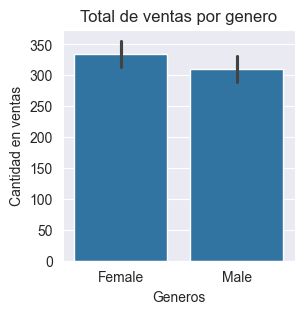

In [70]:
plt.figure(figsize=(3,3))
grafica = sns.barplot(data=fresh, x = 'gender', y= 'total')
grafica.set_title("Total de ventas por genero")
grafica.set_ylabel("Cantidad en ventas")
grafica.set_xlabel("Generos")

Identificamos una distribucion bastante pareja entre la cantidad de hombres y mujeres que compraron, ahora vamos a identificar el cumulo de cantidades para ver si esxite algun patron importante.

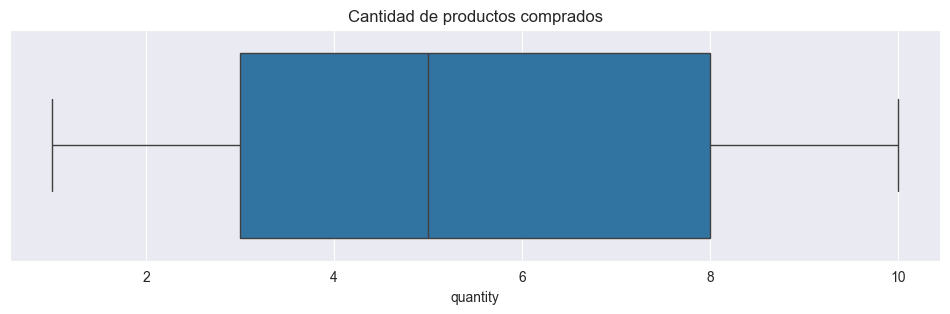

In [76]:
plt.figure(figsize=(12,3))
ax = sns.boxplot(data=fresh, x= fresh['quantity'])
ax.set_title("Cantidad de productos comprados")
plt.ticklabel_format(style='plain', axis= 'x')

Luego de evaluar la columna quantity, verificaremos la columna rating para ver la distribucion de votos general que solemos tener para los productos.

<Axes: xlabel='rating', ylabel='Count'>

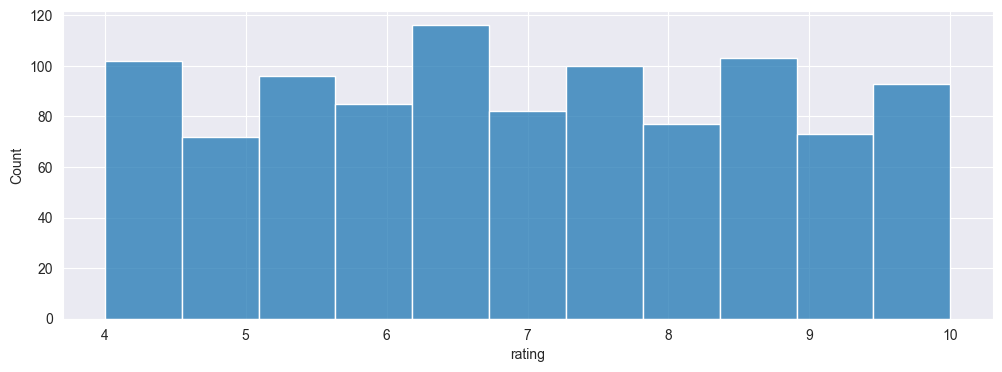

In [61]:
plt.figure(figsize=(12,4))
sns.histplot(data=fresh, x= fresh['rating'])

Teniendo presente cuales son las calificasiones que suelen recibir los productos vamos a realizar una pequena revision de cuales es la distribucion por tipo de clientes.

Text(0, 0.5, 'cantidad')

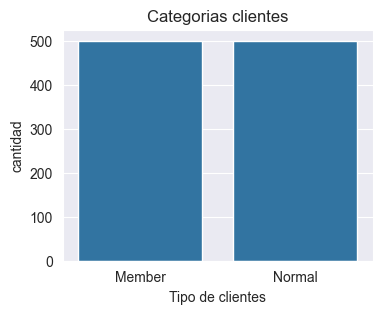

In [78]:
plt.figure(figsize=(4,3))
grafica2 = sns.countplot(data=fresh, x= fresh['customer_type'] )
grafica2.set_title("Categorias clientes")
grafica2.set_xlabel("Tipo de clientes")
grafica2.set_ylabel("cantidad")


Luego de evaluar nuestra categoria de clientes vamos a verificar la cantidad de ventas por ciudades y ver si esxite algun tipo de venta fuera de los parametros para identificar posibles productos con demanda.

Text(24.0, 0.5, 'Totales')

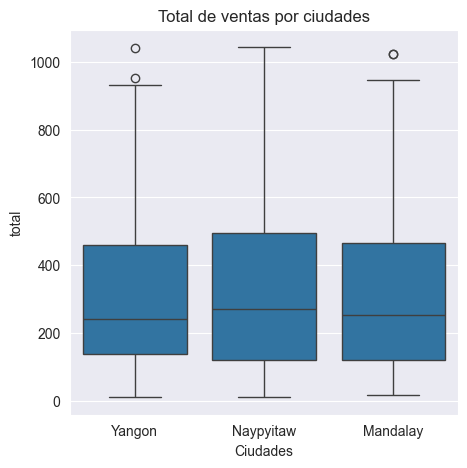

In [90]:
plt.figure(figsize=(5,5))
grafica3= sns.boxplot(data=fresh, x=fresh['city'], y=fresh['total'])
grafica3.set_title("Total de ventas por ciudades")
grafica3.set_xlabel("Ciudades")
grafica2.set_ylabel("Totales")


Ahora veremos una el comportamiento de las ventas a travez del tiempo

<Axes: xlabel='date', ylabel='total'>

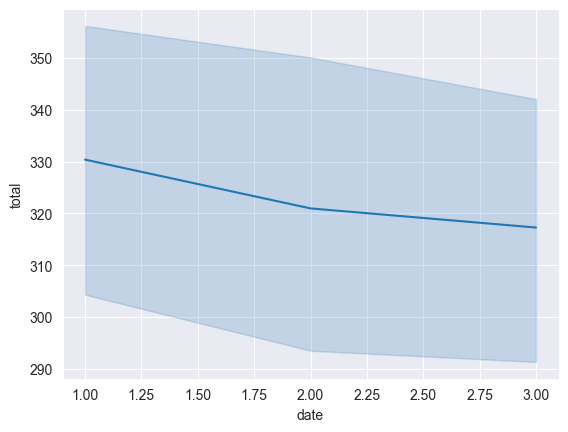

In [110]:
sns.lineplot(data=fresh, x=fresh['date'].dt.month, y=fresh['total'])

Por ultimo queremos saber cual es el metodo de pago mas usado para las compras en fresh market.

Text(0.5, 0, 'Modo de pago')

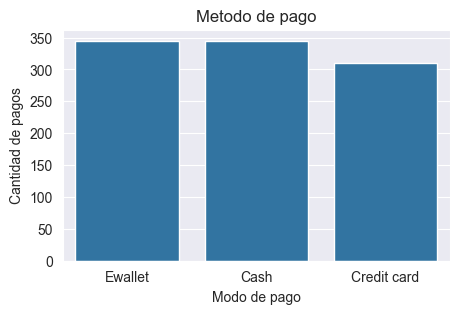

In [112]:
plt.figure(figsize=(5,3))
grafica4 = sns.countplot(fresh, x=fresh['payment'])
grafica4.set_title("Metodo de pago")
grafica4.set_ylabel("Cantidad de pagos")
grafica4.set_xlabel("Modo de pago")
